In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('clown_fish.png')

In [3]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Original Image')

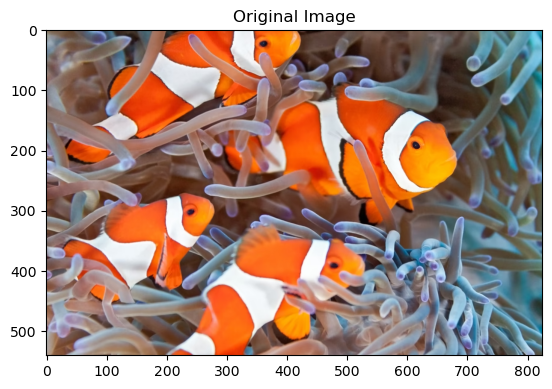

In [4]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Threshold based Segmentation

In [5]:
r, g, b = cv2.split(img_rgb)

In [6]:
r.flatten()
g.flatten()
b.flatten()

array([95, 95, 93, ..., 71, 72, 75], dtype=uint8)

In [7]:
pixel_colors = img_rgb.reshape(
    (np.shape(img_rgb)[0] * np.shape(img_rgb)[1], 3))

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

In [9]:
norm = colors.Normalize()

In [10]:
norm.autoscale(pixel_colors)

In [11]:
pixel_colors = norm(pixel_colors).tolist()

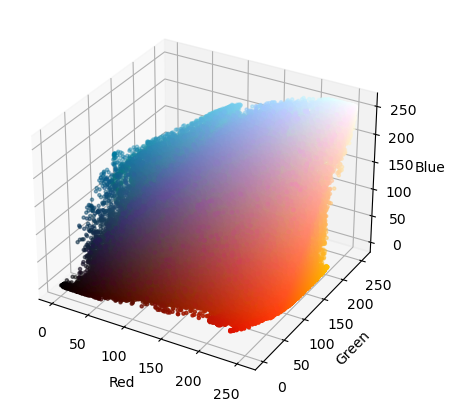

In [12]:
fig = plt.figure(figsize=(5, 5), dpi=100)
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(r, g, b, facecolors=pixel_colors, marker='.')
axis.set_xlabel('Red')
axis.set_ylabel('Green')
axis.set_zlabel('Blue')
plt.show()

In [13]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

Text(0.5, 1.0, 'HSV Image')

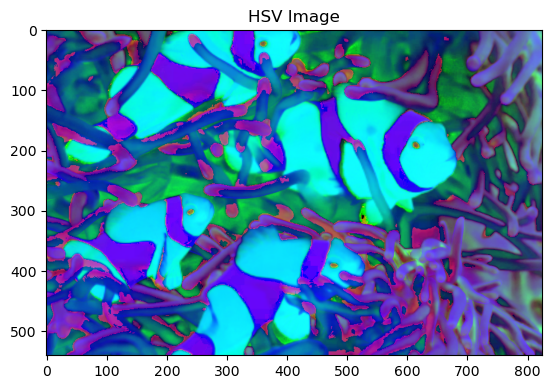

In [14]:
plt.imshow(img_hsv)
plt.title('HSV Image')

In [15]:
h, s, v = cv2.split(img_hsv)

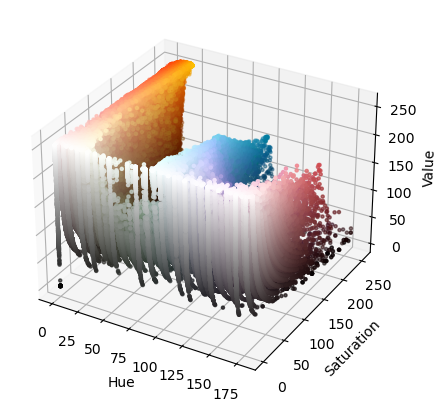

In [16]:
fig = plt.figure(figsize=(5, 5), dpi=100)
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(),
             s.flatten(),
             v.flatten(),
             facecolors=pixel_colors,
             marker='.')
axis.set_xlabel('Hue')
axis.set_ylabel('Saturation')
axis.set_zlabel('Value')
plt.show()

In [17]:
low_thresh_orange = (1, 180, 100)
high_thresh_orange = (25, 255, 255)

In [18]:
orange_mask = cv2.inRange(img_hsv, low_thresh_orange, high_thresh_orange)

In [19]:
orange_mask_result = cv2.bitwise_and(img_rgb, img_rgb, mask=orange_mask)

Text(0.5, 1.0, 'Colored Binary Mask Image')

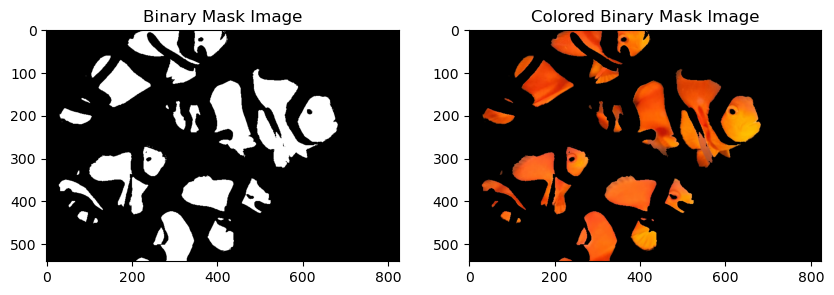

In [20]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(orange_mask, cmap='gray')
plt.title('Binary Mask Image')
plt.subplot(122)
plt.imshow(orange_mask_result)
plt.title('Colored Binary Mask Image')

In [21]:
low_thresh_white = (0, 0, 225)
high_thresh_white = (145, 70, 255)

In [22]:
white_mask = cv2.inRange(img_hsv, low_thresh_white, high_thresh_white)

In [23]:
white_mask_result = cv2.bitwise_and(img_rgb, img_rgb, mask=white_mask)

Text(0.5, 1.0, 'Colored Binary Mask Image')

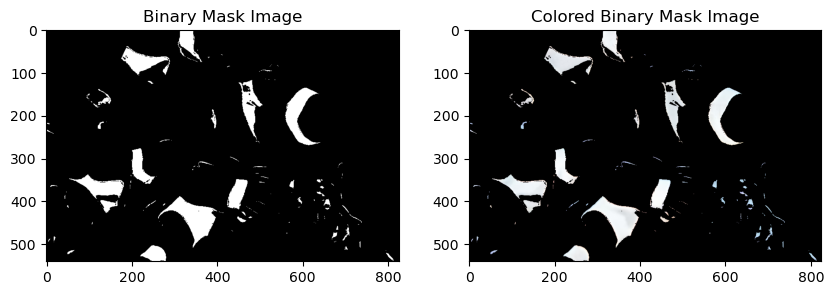

In [24]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(white_mask, cmap='gray')
plt.title('Binary Mask Image')
plt.subplot(122)
plt.imshow(white_mask_result)
plt.title('Colored Binary Mask Image')

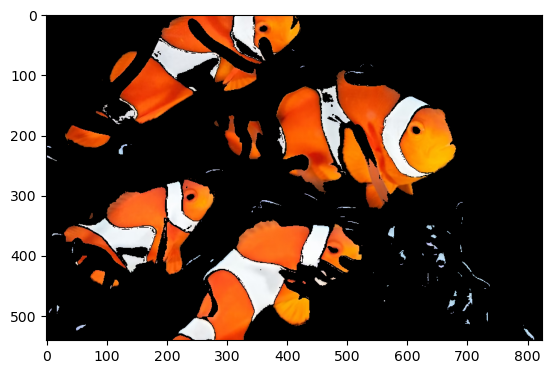

In [25]:
colored_mask_result = cv2.bitwise_or(white_mask_result, orange_mask_result)
plt.imshow(colored_mask_result)